# 1. TẢI DỮ LIỆU

In [60]:
# Tải Kaggle
!pip install kaggle

In [67]:
# Import các thư viện cần thiết
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay, classification_report
warnings.filterwarnings('ignore')
import numpy as np

In [68]:
import os
import zipfile

In [69]:
# Tạo thư mục .kaggle và di chuyển file kaggle.json vào đó
os.makedirs(os.path.expanduser('~/.kaggle'), exist_ok=True)
with open(os.path.expanduser('~/.kaggle/kaggle.json'), 'w') as f:
    f.write('{"username":"<baobui3004>","key":"<1d17c8e7ae8032cbeaab35a424791f8c>"}')
os.chmod(os.path.expanduser('~/.kaggle/kaggle.json'), 0o600)

In [155]:
# Tải dataset từ Kaggle
!kaggle datasets download -d mkechinov/ecommerce-purchase-history-from-jewelry-store

Dataset URL: https://www.kaggle.com/datasets/mkechinov/ecommerce-purchase-history-from-jewelry-store
License(s): copyright-authors
ecommerce-purchase-history-from-jewelry-store.zip: Skipping, found more recently modified local copy (use --force to force download)


In [156]:
# Giải nén file zip
import zipfile

with zipfile.ZipFile("ecommerce-purchase-history-from-jewelry-store.zip", 'r') as zip_ref:
    zip_ref.extractall(".")

# Kiểm tra các file đã giải nén
import os
print(os.listdir("."))

['.anaconda', '.cache', '.conda', '.condarc', '.continuum', '.ipynb_checkpoints', '.ipython', '.jupyter', '.kaggle', '.keras', '.matplotlib', '.virtual_documents', 'A.ipynb', 'airline-customer-satisfaction.zip', 'airline-passenger-satisfaction.zip', 'Airline_customer_satisfaction.csv', 'airline_passenger_satisfaction_data', 'anaconda3', 'AppData', 'Application Data', 'Contacts', 'Cookies', 'Desktop', 'Documents', 'Downloads', 'ecommerce-purchase-history-from-jewelry-store.zip', 'Favorites', 'heart-attack-analysis-prediction-dataset.zip', 'heart_data', 'IntelGraphicsProfiles', 'jewelry.csv', 'Links', 'Local Settings', 'MID.ipynb', 'ML132_AID300_GROUP17.ipynb', 'Music', 'My Documents', 'NetHood', 'NTUSER.DAT', 'ntuser.dat.LOG1', 'ntuser.dat.LOG2', 'NTUSER.DAT{aa9713a2-c350-11ed-9f0e-b3ac532ca29c}.TxR.0.regtrans-ms', 'NTUSER.DAT{aa9713a2-c350-11ed-9f0e-b3ac532ca29c}.TxR.1.regtrans-ms', 'NTUSER.DAT{aa9713a2-c350-11ed-9f0e-b3ac532ca29c}.TxR.2.regtrans-ms', 'NTUSER.DAT{aa9713a2-c350-11ed-9f0

In [157]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

df_cols = ['Datetime','OrderID','ProductID','Quantity','CategoryID','CategoryCode','BrandID','USDPrice','UserID','Gender','Color','Metal','Gem']
df = pd.read_csv('jewelry.csv',names=df_cols )
df.head(2)

,Datetime,OrderID,ProductID,Quantity,CategoryID,CategoryCode,BrandID,USDPrice,UserID,Gender,Color,Metal,Gem
0,2018-12-01 11:40:29 UTC,1924719191579951782,1842195256808833386,1,1.806829e+18,jewelry.earring,0.0,561.51,1.515916e+18,NaN,red,gold,diamond
1,2018-12-01 17:38:31 UTC,1924899396621697920,1806829193678291446,1,1.806829e+18,NaN,NaN,212.14,1.515916e+18,NaN,yellow,gold,NaN


# 2. LÀM SẠCH DỮ LIỆU

In [158]:
# Hiển thị thông tin DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95911 entries, 0 to 95910
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Datetime      95911 non-null  object 
 1   OrderID       95911 non-null  int64  
 2   ProductID     95911 non-null  int64  
 3   Quantity      95911 non-null  int64  
 4   CategoryID    90559 non-null  float64
 5   CategoryCode  85978 non-null  object 
 6   BrandID       91126 non-null  float64
 7   USDPrice      90559 non-null  float64
 8   UserID        90559 non-null  float64
 9   Gender        47743 non-null  object 
 10  Color         88251 non-null  object 
 11  Metal         90449 non-null  object 
 12  Gem           61853 non-null  object 
dtypes: float64(4), int64(3), object(6)
memory usage: 9.5+ MB


In [159]:
# Đếm số lượng giá trị thiếu (NA - Not Available) trong mỗi cột của DataFrame
df.isna().sum()

Datetime            0
OrderID             0
ProductID           0
Quantity            0
CategoryID       5352
CategoryCode     9933
BrandID          4785
USDPrice         5352
UserID           5352
Gender          48168
Color            7660
Metal            5462
Gem             34058
dtype: int64

## 2.1. Gender

<Axes: xlabel='Gender', ylabel='count'>

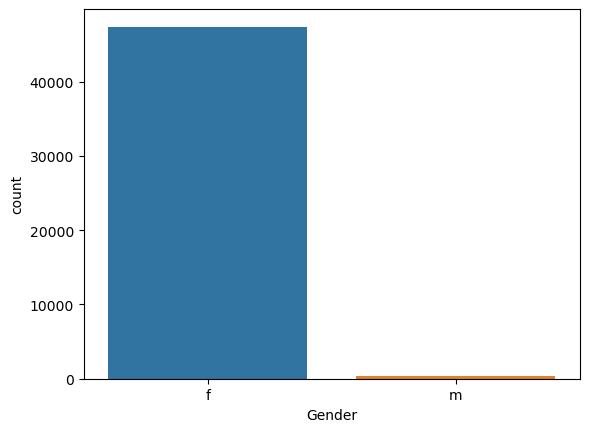

In [160]:
import seaborn as sns
import matplotlib.pyplot as plt
# Tạo biểu đồ phân bố tần suất cho biến Gender
sns.countplot(data = df, x = 'Gender')

Phần lớn khách hàng là nữ, nhóm thay các giá trị còn thiếu bằng 'f'.

In [161]:
# Thay thế tất cả các giá trị thiếu (NA) trong cột Gender của DataFrame df bằng giá trị 'f'
df.Gender.fillna('f', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95911 entries, 0 to 95910
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Datetime      95911 non-null  object 
 1   OrderID       95911 non-null  int64  
 2   ProductID     95911 non-null  int64  
 3   Quantity      95911 non-null  int64  
 4   CategoryID    90559 non-null  float64
 5   CategoryCode  85978 non-null  object 
 6   BrandID       91126 non-null  float64
 7   USDPrice      90559 non-null  float64
 8   UserID        90559 non-null  float64
 9   Gender        95911 non-null  object 
 10  Color         88251 non-null  object 
 11  Metal         90449 non-null  object 
 12  Gem           61853 non-null  object 
dtypes: float64(4), int64(3), object(6)
memory usage: 9.5+ MB


## 2.2. Quantity

In [162]:
# Lấy danh sách các giá trị duy nhất trong cột 
df.Quantity.unique()

array([1], dtype=int64)

Vì chỉ có một giá trị duy nhất trong tính năng 'Số lượng' nên nhóm sẽ bỏ cột.

In [163]:
# loại bỏ cột 'Quantity'
df.drop('Quantity',axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95911 entries, 0 to 95910
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Datetime      95911 non-null  object 
 1   OrderID       95911 non-null  int64  
 2   ProductID     95911 non-null  int64  
 3   CategoryID    90559 non-null  float64
 4   CategoryCode  85978 non-null  object 
 5   BrandID       91126 non-null  float64
 6   USDPrice      90559 non-null  float64
 7   UserID        90559 non-null  float64
 8   Gender        95911 non-null  object 
 9   Color         88251 non-null  object 
 10  Metal         90449 non-null  object 
 11  Gem           61853 non-null  object 
dtypes: float64(4), int64(2), object(6)
memory usage: 8.8+ MB


## 2.3. USD Price & User ID

In [164]:
# Đếm số lượng giá trị thiếu
df.USDPrice.isna().sum()

5352

In [165]:
# In ra các giá trị duy nhất trong cột 'Gem' khi cột 'USDPrice' là NaN
print(df[df['USDPrice'].isna()].Gem.unique())
# In ra các giá trị duy nhất trong cột 'Metal' khi cột 'USDPrice' là NaN
print(df[df['USDPrice'].isna()].Metal.unique())
# In ra các giá trị duy nhất trong cột 'BrandID' khi cột 'USDPrice' là NaN
print(df[df['USDPrice'].isna()].BrandID.unique())

[nan]
[nan]
[1.55061295e+18 1.32515621e+18 1.51591563e+18 ... 1.51591563e+18
 1.51591563e+18 1.51591563e+18]


In [166]:
# Đếm số lượng các giá trị trong cột 'BrandID' khi 'USDPrice' là NaN
df[df['USDPrice'].isna()].BrandID.value_counts()

BrandID
1.515916e+18    147
1.515916e+18    104
1.515916e+18     74
1.515916e+18     37
1.515916e+18     34
               ... 
1.515916e+18      1
1.515916e+18      1
1.515916e+18      1
1.515916e+18      1
1.515916e+18      1
Name: count, Length: 2530, dtype: int64

In [167]:
# Mô tả dữ liệu khi 'BrandID' là 1515915625368881664.000000
df[df['BrandID']==1515915625368881664.000000].describe()

,OrderID,ProductID,CategoryID,BrandID,USDPrice,UserID
count,3.400000e+01,3.400000e+01,0.0,3.400000e+01,0.0,0.0
mean,2.638980e+18,1.511337e+18,NaN,1.515916e+18,NaN,NaN
std,3.443835e+16,2.699059e+16,NaN,5.196997e+02,NaN,NaN
min,2.532276e+18,1.358585e+18,NaN,1.515916e+18,NaN,NaN
25%,2.625246e+18,1.515966e+18,NaN,1.515916e+18,NaN,NaN
50%,2.657495e+18,1.515966e+18,NaN,1.515916e+18,NaN,NaN
75%,2.661770e+18,1.515966e+18,NaN,1.515916e+18,NaN,NaN
max,2.676981e+18,1.515966e+18,NaN,1.515916e+18,NaN,NaN


Có ID đơn hàng nhưng không có giá và không có ID người dùng.

Nhóm quan tâm doanh số bán hàng chứ không phải số lượng đơn đặt hàng.

Nhóm xóa các hàng có giá trị bị thiếu trong USDPrice và UserID.

In [168]:
# Lọc dữ liệu khi cả 'USDPrice' và 'UserID' không phải là NaN
new_df = df[df['USDPrice'].notna() & df['UserID'].notna()]

In [169]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90559 entries, 0 to 95910
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Datetime      90559 non-null  object 
 1   OrderID       90559 non-null  int64  
 2   ProductID     90559 non-null  int64  
 3   CategoryID    90559 non-null  float64
 4   CategoryCode  80626 non-null  object 
 5   BrandID       85774 non-null  float64
 6   USDPrice      90559 non-null  float64
 7   UserID        90559 non-null  float64
 8   Gender        90559 non-null  object 
 9   Color         88251 non-null  object 
 10  Metal         90449 non-null  object 
 11  Gem           61853 non-null  object 
dtypes: float64(4), int64(2), object(6)
memory usage: 9.0+ MB


## 2.4. Category Code

In [170]:
# Điền giá trị NaN trong cột 'CategoryCode' bằng 'other'
new_df.CategoryCode.fillna('other', inplace=True)

In [171]:
new_df.CategoryCode.value_counts()

CategoryCode
jewelry.earring       29052
jewelry.ring          28300
jewelry.pendant       13088
other                  9933
jewelry.bracelet       6188
jewelry.necklace       2361
jewelry.brooch         1288
jewelry.souvenir        170
electronics.clocks      167
jewelry.stud             12
Name: count, dtype: int64

## 2.5. Brand ID

In [172]:
# Điền giá trị NaN trong cột 'BrandID' bằng '-1'
new_df['BrandID'].fillna('-1',inplace=True)

In [173]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90559 entries, 0 to 95910
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Datetime      90559 non-null  object 
 1   OrderID       90559 non-null  int64  
 2   ProductID     90559 non-null  int64  
 3   CategoryID    90559 non-null  float64
 4   CategoryCode  90559 non-null  object 
 5   BrandID       90559 non-null  object 
 6   USDPrice      90559 non-null  float64
 7   UserID        90559 non-null  float64
 8   Gender        90559 non-null  object 
 9   Color         88251 non-null  object 
 10  Metal         90449 non-null  object 
 11  Gem           61853 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 9.0+ MB


## 2.6. Gem & Metal & Color

In [174]:
# Lấy các giá trị duy nhất trong cột 'Gem'
new_df['Gem'].unique()

array(['diamond', nan, 'sapphire', 'amethyst', 'fianit', 'pearl',
       'quartz', 'topaz', 'garnet', 'quartz_smoky', 'ruby', 'agate',
       'mix', 'citrine', 'emerald', 'amber', 'chrysolite', 'chrysoprase',
       'nanocrystal', 'turquoise', 'sitall', 'corundum_synthetic',
       'coral', 'onyx', 'nacre', 'spinel', 'tourmaline',
       'emerald_geothermal', 'garnet_synthetic', 'rhodolite',
       'sapphire_geothermal'], dtype=object)

In [175]:
# Sử dụng vòng lặp để điền giá trị NaN
for i in ('Color','Metal','Gem'):
  if i == 'Color':
    new_df[i].fillna('unknown-color',inplace=True)
  else:
    new_df[i].fillna('unknown',inplace=True)

In [176]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90559 entries, 0 to 95910
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Datetime      90559 non-null  object 
 1   OrderID       90559 non-null  int64  
 2   ProductID     90559 non-null  int64  
 3   CategoryID    90559 non-null  float64
 4   CategoryCode  90559 non-null  object 
 5   BrandID       90559 non-null  object 
 6   USDPrice      90559 non-null  float64
 7   UserID        90559 non-null  float64
 8   Gender        90559 non-null  object 
 9   Color         90559 non-null  object 
 10  Metal         90559 non-null  object 
 11  Gem           90559 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 9.0+ MB


# 3. TRỰC QUAN HÓA DỮ LIỆU

## 3.1. Color

Color
red              69511
white            15286
yellow            3388
unknown-color     2372
black                2
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='Color'>

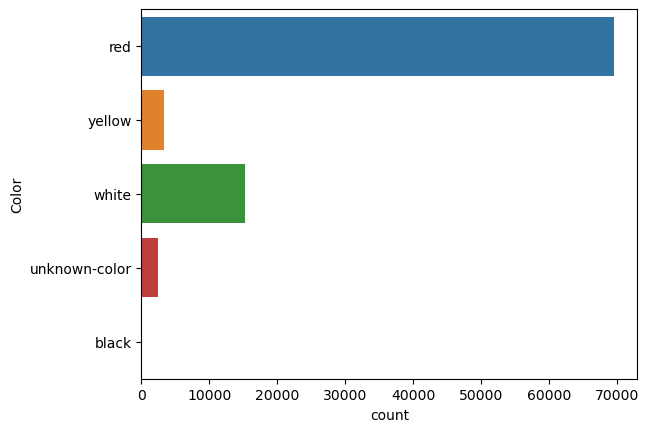

In [177]:
# In số lượng các giá trị khác nhau trong cột Color
print(new_df.Color.value_counts())
# Vẽ biểu đồ thanh (count plot) cho cột Color
sns.countplot(y ='Color', data = new_df)

## 3.2. Metal types per Brand ID

Metal
gold        89082
silver       1365
unknown       110
platinum        2
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='BrandID'>

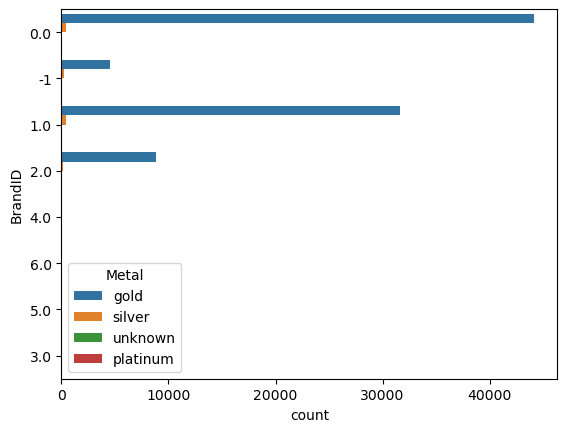

In [178]:
# In số lượng các giá trị khác nhau trong cột Metal
print(new_df.Metal.value_counts())
# ẽ biểu đồ thanh (count plot) cho cột BrandID, phân loại theo Metal
sns.countplot(y ='BrandID', hue = "Metal", data = new_df)

## 3.3. Gem

<Axes: xlabel='count', ylabel='Gem'>

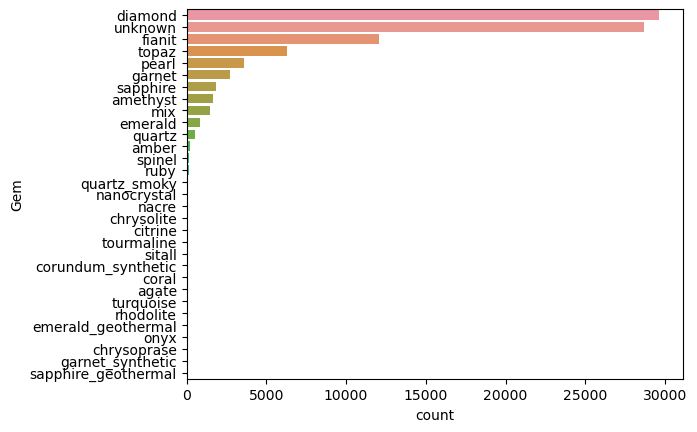

In [179]:
# Vẽ biểu đồ thanh (count plot) cho cột Gem, sắp xếp theo số lượng
sns.countplot(data = new_df, y = 'Gem', order = new_df['Gem'].value_counts().index)

## 3.4. Category Code

<Axes: xlabel='count', ylabel='CategoryCode'>

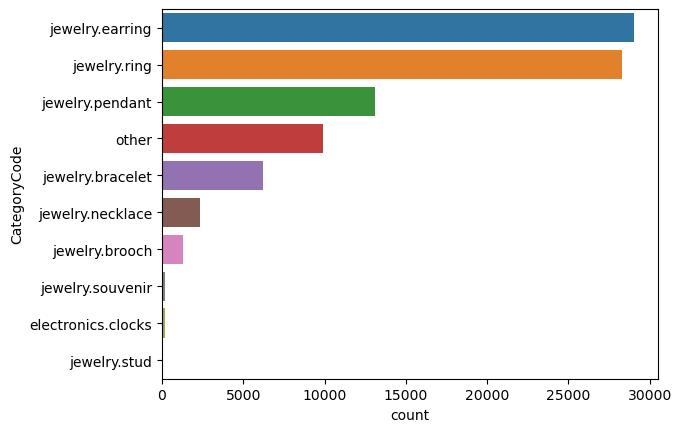

In [180]:
# Vẽ biểu đồ thanh (count plot) cho cột CategoryCode, sắp xếp theo số lượng
sns.countplot(data = new_df, y = 'CategoryCode', order = new_df['CategoryCode'].value_counts().index)

## 3.5. Brand ID

BrandID
0.0    44600
1.0    32022
2.0     8966
-1      4785
4.0       65
3.0       58
6.0       56
5.0        7
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='BrandID'>

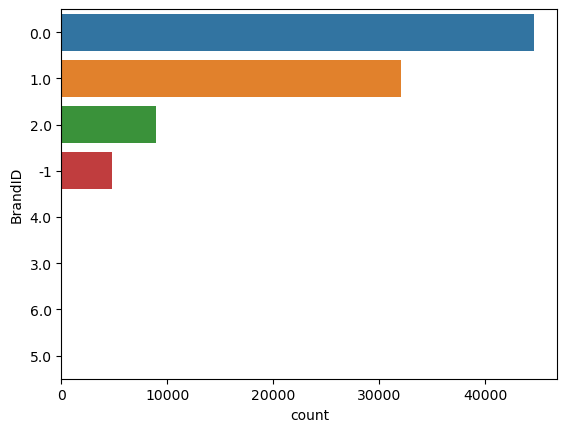

In [181]:
# In số lượng các giá trị khác nhau trong cột BrandID
print(new_df.BrandID.value_counts())
# Tạo biểu đồ thanh (count plot) cho cột BrandID
sns.countplot(data = new_df, y = 'BrandID', order = new_df['BrandID'].value_counts().index)

<Axes: xlabel='BrandID'>

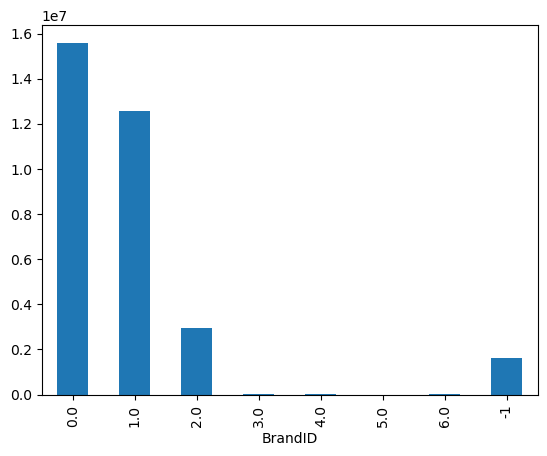

In [182]:
# Nhóm các hàng theo BrandID và tính tổng giá trị USDPrice cho mỗi BrandID. Vẽ biểu đồ thanh hiển thị tổng USDPrice theo từng BrandID
new_df.groupby('BrandID').USDPrice.sum().plot.bar()

<Axes: xlabel='BrandID', ylabel='count'>

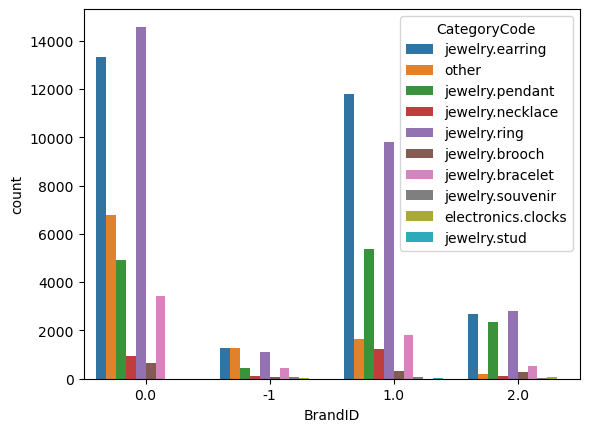

In [183]:
# # Lọc dữ liệu để chỉ giữ các hàng có 'BrandID' nhỏ hơn hoặc bằng 2 (chuyển thành số nguyên). Vẽ biểu đồ thanh cho 'BrandID' phân loại theo 'CategoryCode'
sns.countplot(x ='BrandID', hue = "CategoryCode", data = new_df[new_df['BrandID'].astype(int)<= 2])

## 3.6. Total Jewelry Sales

In [184]:
# Chuyển đổi cột 'Datetime' để chỉ giữ lại phần ngày
new_df['Datetime'] = new_df.Datetime.apply(lambda x : x[:10])
new_df.head()

,Datetime,OrderID,ProductID,CategoryID,CategoryCode,BrandID,USDPrice,UserID,Gender,Color,Metal,Gem
0,2018-12-01,1924719191579951782,1842195256808833386,1.806829e+18,jewelry.earring,0.0,561.51,1.515916e+18,f,red,gold,diamond
1,2018-12-01,1924899396621697920,1806829193678291446,1.806829e+18,other,-1,212.14,1.515916e+18,f,yellow,gold,unknown
2,2018-12-02,1925511016616034733,1842214461889315556,1.806829e+18,jewelry.pendant,1.0,54.66,1.515916e+18,f,white,gold,sapphire
3,2018-12-02,1925626951238681511,1835566849434059453,1.806829e+18,jewelry.pendant,0.0,88.90,1.515916e+18,f,red,gold,diamond
4,2018-12-02,1925740842841014667,1873936840742928865,1.806829e+18,jewelry.necklace,0.0,417.67,1.515916e+18,f,red,gold,amethyst


In [185]:
# Nhập lớp datetime từ thư viện datetime
from datetime import datetime
# Chuyển đổi cột 'Datetime' từ chuỗi sang đối tượng datetime
# Sử dụng apply với lambda để áp dụng hàm datetime.strptime cho mỗi giá trị trong cột 'Datetime'
new_df['Datetime'] = new_df['Datetime'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90559 entries, 0 to 95910
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Datetime      90559 non-null  datetime64[ns]
 1   OrderID       90559 non-null  int64         
 2   ProductID     90559 non-null  int64         
 3   CategoryID    90559 non-null  float64       
 4   CategoryCode  90559 non-null  object        
 5   BrandID       90559 non-null  object        
 6   USDPrice      90559 non-null  float64       
 7   UserID        90559 non-null  float64       
 8   Gender        90559 non-null  object        
 9   Color         90559 non-null  object        
 10  Metal         90559 non-null  object        
 11  Gem           90559 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(6)
memory usage: 9.0+ MB


In [186]:
new_df.head()

,Datetime,OrderID,ProductID,CategoryID,CategoryCode,BrandID,USDPrice,UserID,Gender,Color,Metal,Gem
0,2018-12-01,1924719191579951782,1842195256808833386,1.806829e+18,jewelry.earring,0.0,561.51,1.515916e+18,f,red,gold,diamond
1,2018-12-01,1924899396621697920,1806829193678291446,1.806829e+18,other,-1,212.14,1.515916e+18,f,yellow,gold,unknown
2,2018-12-02,1925511016616034733,1842214461889315556,1.806829e+18,jewelry.pendant,1.0,54.66,1.515916e+18,f,white,gold,sapphire
3,2018-12-02,1925626951238681511,1835566849434059453,1.806829e+18,jewelry.pendant,0.0,88.90,1.515916e+18,f,red,gold,diamond
4,2018-12-02,1925740842841014667,1873936840742928865,1.806829e+18,jewelry.necklace,0.0,417.67,1.515916e+18,f,red,gold,amethyst


In [187]:
# Tạo bảng pivot để tổng hợp dữ liệu từ DataFrame new_df
sales_df = pd.pivot_table(new_df,      # Sử dụng pivot_table từ pandas để tổng hợp dữ liệu
                 index='Datetime',     # Đặt 'Datetime' làm chỉ mục (index) để nhóm các hàng theo ngày
                 values='USDPrice',    # Đặt 'USDPrice' làm cột giá trị để tính tổng
                 aggfunc='sum'         # Sử dụng hàm tổng hợp là 'sum' để tính tổng giá trị 'USDPrice' cho mỗi ngày
                 ).reset_index()       # Đặt lại chỉ mục để chuyển 'Datetime' từ chỉ mục thành cột

# Hiển thị 5 hàng đầu tiên của DataFrame sales_df để kiểm tra kết quả
sales_df.head()

,Datetime,USDPrice
0,2018-12-01,773.65
1,2018-12-02,897.47
2,2018-12-03,978.85
3,2018-12-04,3486.05
4,2018-12-05,1246.58


In [188]:
sales_df.sort_values('Datetime',inplace=True)

In [189]:
import numpy as np

# sns.regplot không thể đọc loại ngày trong x nên ...
sales_df['Time'] = np.arange(len(sales_df.index))

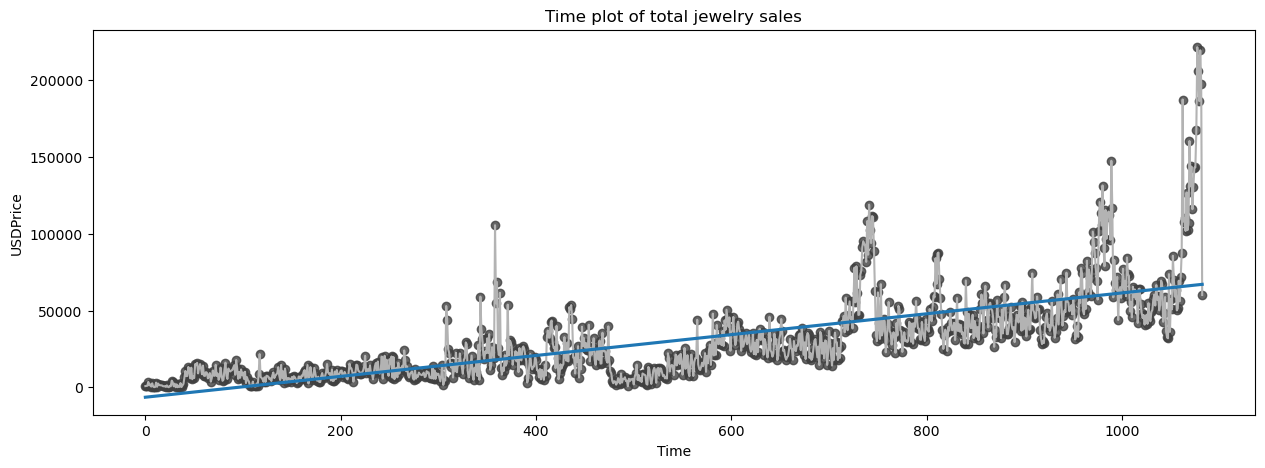

In [190]:
import matplotlib.pyplot as plt
import seaborn as sns
# Tạo figure và các trục (ax) cho biểu đồ với kích thước 15x5 inch
fig, ax = plt.subplots(figsize=(15, 5))
# Vẽ biểu đồ tuyến (line plot) của 'USDPrice' theo 'Time' với màu xám
ax.plot(sales_df['Time'], sales_df['USDPrice'], color='0.7')
# Tạo biểu đồ hồi quy tuyến tính (regplot) trên cùng ax với scatter màu xám đậm
ax = sns.regplot(x=sales_df['Time'], y=sales_df['USDPrice'], ci=None, scatter_kws=dict(color='0.25'))
# Đặt tiêu đề cho biểu đồ
ax.set_title('Time plot of total jewelry sales')
# Hiển thị biểu đồ
plt.show()

In [191]:
# In ra tổng số ngày trong sales_df bằng cách lấy giá trị lớn nhất của cột 'Time'
# và định dạng kết quả dưới dạng chuỗi với chú thích 'days'
print(f'Total number of days in sales_df: {sales_df["Time"].max()} days')

Total number of days in sales_df: 1082 days


In [192]:
# Hiển thị 5 hàng đầu tiên của DataFrame sales_df
display(sales_df.head())
# Hiển thị 5 hàng cuối cùng của DataFrame sales_df
display(sales_df.tail())

,Datetime,USDPrice,Time
0,2018-12-01,773.65,0
1,2018-12-02,897.47,1
2,2018-12-03,978.85,2
3,2018-12-04,3486.05,3
4,2018-12-05,1246.58,4


,Datetime,USDPrice,Time
1078,2021-11-27,206071.70,1078
1079,2021-11-28,186474.59,1079
1080,2021-11-29,219555.01,1080
1081,2021-11-30,197417.90,1081
1082,2021-12-01,60113.20,1082


In [193]:
# Xóa cột 'Time' khỏi DataFrame sales_df
sales_df.drop('Time', axis=1, inplace=True)

# 3. DEEP LEARNING

## 3.1. Chuyển đổi sang bài toán Chuỗi thời gian

In [194]:
def series_to_supervised(data, window=1, lag=1, dropnan=True):
    cols, names = list(), list()
    # Dãy số đầu vào (t-n, ... t-1)
    for i in range(window, 0, -1):
        cols.append(data.shift(i))  # Dịch chuyển dữ liệu lên i khoảng thời gian
        names += [('%s(t-%d)' % (col, i)) for col in data.columns]  # Tạo tên cột mới theo định dạng 'Tên cột(t-i)'
    # Thời gian hiện tại (t=0)
    cols.append(data)  # Giữ nguyên dữ liệu tại thời điểm hiện tại
    names += [('%s(t)' % (col)) for col in data.columns]  # Tạo tên cột mới theo định dạng 'Tên cột(t)'
    # Thời gian mục tiêu (t=lag)
    cols.append(data.shift(-lag))  # Dịch chuyển dữ liệu xuống lag khoảng thời gian
    names += [('%s(t+%d)' % (col, lag)) for col in data.columns]  # Tạo tên cột mới theo định dạng 'Tên cột(t+lag)'
    # Ghép tất cả lại thành một DataFrame
    agg = pd.concat(cols, axis=1)  # Nối các cột đã dịch chuyển và cột hiện tại theo trục cột
    agg.columns = names  # Đặt tên các cột theo danh sách đã tạo
    # Xóa các hàng có giá trị NaN
    if dropnan:
        agg.dropna(inplace=True)  # Xóa các hàng có giá trị NaN nếu dropnan=True
    return agg  # Trả về DataFrame đã được chuyển đổi

In [195]:
# Đặt giá trị cho biến 'window' là 30
window = 30
# Đặt giá trị cho biến 'lag' là 60
lag = 60
# Chuyển đổi DataFrame sales_df (sau khi đã loại bỏ cột 'Datetime') thành dữ liệu giám sát
# Sử dụng hàm series_to_supervised với cửa sổ thời gian là 30 và khoảng trễ là 60
series = series_to_supervised(sales_df.drop('Datetime', axis=1), window=window, lag=lag)
# Hiển thị 5 hàng đầu tiên của DataFrame series để kiểm tra kết quả
series.head()

,USDPrice(t-30),USDPrice(t-29),USDPrice(t-28),USDPrice(t-27),USDPrice(t-26),USDPrice(t-25),USDPrice(t-24),USDPrice(t-23),USDPrice(t-22),USDPrice(t-21),...,USDPrice(t-8),USDPrice(t-7),USDPrice(t-6),USDPrice(t-5),USDPrice(t-4),USDPrice(t-3),USDPrice(t-2),USDPrice(t-1),USDPrice(t),USDPrice(t+60)
30,773.65,897.47,978.85,3486.05,1246.58,1922.62,442.60,2589.26,458.07,68.36,...,1234.01,266.99,45.12,948.84,616.30,4318.76,3234.17,642.99,2355.89,12764.49
31,897.47,978.85,3486.05,1246.58,1922.62,442.60,2589.26,458.07,68.36,212.14,...,266.99,45.12,948.84,616.30,4318.76,3234.17,642.99,2355.89,42.31,14353.13
32,978.85,3486.05,1246.58,1922.62,442.60,2589.26,458.07,68.36,212.14,3064.28,...,45.12,948.84,616.30,4318.76,3234.17,642.99,2355.89,42.31,1909.46,8185.48
33,3486.05,1246.58,1922.62,442.60,2589.26,458.07,68.36,212.14,3064.28,313.43,...,948.84,616.30,4318.76,3234.17,642.99,2355.89,42.31,1909.46,51.92,17748.04
34,1246.58,1922.62,442.60,2589.26,458.07,68.36,212.14,3064.28,313.43,2443.00,...,616.30,4318.76,3234.17,642.99,2355.89,42.31,1909.46,51.92,1045.02,12493.57


## 3.2. Tách dữ liệu

In [196]:
from sklearn.model_selection import train_test_split  # Nhập hàm train_test_split từ thư viện sklearn để chia tập dữ liệu
lag_size = lag  # Đặt giá trị của biến lag_size bằng giá trị của biến lag
# Tên cột nhãn (label) cho tập dữ liệu
labels_col = 'USDPrice(t+%d)' % lag_size  # Định dạng tên cột nhãn dựa trên giá trị lag_size, ví dụ 'USDPrice(t+60)'
# Tách nhãn (label) từ DataFrame series
labels = series[labels_col]  # Trích xuất cột nhãn từ DataFrame series
# Loại bỏ cột nhãn khỏi DataFrame series
series = series.drop(labels_col, axis=1)  # Loại bỏ cột nhãn để chỉ còn lại các đặc trưng (features)
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra (test set)
X_train, X_test, Y_train, Y_test = train_test_split(series, labels.values, test_size=0.2, random_state=0)  
# Chia tập dữ liệu thành 80% tập huấn luyện và 20% tập kiểm tra
# Sử dụng random_state=0 để đảm bảo kết quả chia tách nhất quán
# Tiếp tục chia tập huấn luyện thành tập huấn luyện và tập xác thực (validation set)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.4, random_state=0)  
# Chia tập huấn luyện thành 60% tập huấn luyện và 40% tập xác thực
# Tập huấn luyện ban đầu 80%, sau khi chia, sẽ trở thành 48% tập huấn luyện và 32% tập xác thực của tổng dữ liệu
# In kích thước của các tập dữ liệu
print('Train set shape', X_train.shape)       # In kích thước của tập huấn luyện
print('Validation set shape', X_valid.shape)  # In kích thước của tập xác thực
print('Test set shape', X_test.shape)         # In kích thước của tập kiểm tra
# Hiển thị 5 hàng đầu tiên của tập huấn luyện X_train để kiểm tra
X_train.head()

Train set shape (476, 31)
Validation set shape (318, 31)
Test set shape (199, 31)


,USDPrice(t-30),USDPrice(t-29),USDPrice(t-28),USDPrice(t-27),USDPrice(t-26),USDPrice(t-25),USDPrice(t-24),USDPrice(t-23),USDPrice(t-22),USDPrice(t-21),...,USDPrice(t-9),USDPrice(t-8),USDPrice(t-7),USDPrice(t-6),USDPrice(t-5),USDPrice(t-4),USDPrice(t-3),USDPrice(t-2),USDPrice(t-1),USDPrice(t)
815,41558.62,28410.53,41806.85,39412.43,56162.33,44658.92,38351.92,38208.81,31200.34,30898.30,...,52621.30,59787.40,58571.98,84109.31,67384.50,87114.52,87750.93,70532.95,58081.88,47946.11
629,23822.30,35982.08,36959.99,45847.13,33602.10,27427.05,30436.61,41152.21,42834.54,37652.99,...,23223.12,25539.97,35169.58,21575.33,29030.60,21246.71,30898.09,22824.59,33465.90,38132.83
197,2465.58,6938.58,13159.55,8249.61,5014.07,7053.64,12646.07,9001.28,5607.48,4217.72,...,8665.36,9077.70,4469.33,11540.12,4045.76,4356.33,10229.27,5426.08,11240.78,7716.25
564,5673.86,22142.53,19359.24,10447.35,13620.39,14574.96,13923.72,7876.33,16523.91,21314.56,...,20918.57,9665.23,7209.68,15748.01,21369.42,16209.65,7377.27,16286.23,18960.71,19099.50
51,228.73,1234.01,266.99,45.12,948.84,616.30,4318.76,3234.17,642.99,2355.89,...,7251.81,7364.79,13222.37,11677.82,5802.28,12750.76,5232.85,7142.98,6002.55,15081.57


In [197]:
# Tải Tensorflow
!pip install tensorflow

In [198]:
import tensorflow as tf
from keras import optimizers
from keras.models import Sequential, Model
from keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error

In [199]:
# Chuyển đổi tập huấn luyện X_train thành định dạng 3D cho mô hình học sâu
# Định dạng mới: (số lượng mẫu, số lượng đặc trưng, 1)
X_train_series = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
# Chuyển đổi tập xác thực X_valid thành định dạng 3D
# Định dạng mới: (số lượng mẫu, số lượng đặc trưng, 1)
X_valid_series = X_valid.values.reshape((X_valid.shape[0], X_valid.shape[1], 1))
# Chuyển đổi tập kiểm tra X_test thành định dạng 3D
# Định dạng mới: (số lượng mẫu, số lượng đặc trưng, 1)
X_test_series = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))
# In kích thước của tập huấn luyện sau khi chuyển đổi
print('Train set shape', X_train_series.shape)  # In kích thước của tập huấn luyện X_train_series
# In kích thước của tập xác thực sau khi chuyển đổi
print('Validation set shape', X_valid_series.shape)  # In kích thước của tập xác thực X_valid_series
# In kích thước của tập kiểm tra sau khi chuyển đổi
print('Test set shape', X_test_series.shape)  # In kích thước của tập kiểm tra X_test_series

Train set shape (476, 31, 1)
Validation set shape (318, 31, 1)
Test set shape (199, 31, 1)


In [200]:
pd.DataFrame(X_valid).head(3)

,USDPrice(t-30),USDPrice(t-29),USDPrice(t-28),USDPrice(t-27),USDPrice(t-26),USDPrice(t-25),USDPrice(t-24),USDPrice(t-23),USDPrice(t-22),USDPrice(t-21),...,USDPrice(t-9),USDPrice(t-8),USDPrice(t-7),USDPrice(t-6),USDPrice(t-5),USDPrice(t-4),USDPrice(t-3),USDPrice(t-2),USDPrice(t-1),USDPrice(t)
194,4610.59,9428.83,14496.44,2465.58,6938.58,13159.55,8249.61,5014.07,7053.64,12646.07,...,9692.96,15112.52,9859.27,8665.36,9077.70,4469.33,11540.12,4045.76,4356.33,10229.27
610,24114.55,47956.47,20734.53,29053.79,21117.25,40586.51,28532.89,28065.77,31925.34,28368.23,...,36959.99,45847.13,33602.10,27427.05,30436.61,41152.21,42834.54,37652.99,35512.78,23751.10
687,19583.59,20465.97,24501.21,31472.21,25540.85,24641.04,18003.41,30148.61,25386.44,23518.49,...,35369.95,33891.31,19158.13,22322.18,17815.32,19397.82,25410.44,30309.50,31418.69,25091.60


## 3.3. LSTM Model

In [201]:
epochs = 200  # Đặt số lượng epoch (số lần huấn luyện toàn bộ dữ liệu) là 200
batch = 65  # Đặt kích thước batch (số lượng mẫu trong mỗi lần cập nhật gradient) là 65
lr = 0.0005  # Đặt tốc độ học (learning rate) là 0.0005
# Khởi tạo bộ tối ưu Adamax từ Keras
# Adamax là một biến thể của bộ tối ưu Adam, được thiết kế để xử lý các gradient lớn
adam = tf.keras.optimizers.Adamax(learning_rate=lr)  # Sử dụng Adamax với tốc độ học đã định nghĩa trước đó

In [202]:
from tensorflow.keras.layers import Dropout  # Nhập lớp Dropout từ Keras để áp dụng dropout trong mô hình
# Khởi tạo mô hình Sequential cho mạng LSTM
model_lstm = Sequential()  # Tạo một mô hình Sequential mới
# Thêm lớp LSTM với 165 đơn vị, hàm kích hoạt 'relu', và định dạng đầu vào (number of timesteps, number of features)
model_lstm.add(LSTM(165, activation='relu', input_shape=(X_train_series.shape[1], X_train_series.shape[2])))
# Thêm lớp Dropout với tỷ lệ dropout là 0.5 để giảm thiểu overfitting
model_lstm.add(Dropout(0.5))  # Thêm lớp Dropout để loại bỏ ngẫu nhiên 50% số đơn vị trong quá trình huấn luyện
# Thêm lớp Dense với 56 đơn vị để kết nối đầy đủ (fully connected layer)
model_lstm.add(Dense(56))  # Thêm lớp Dense với 56 đơn vị
# Thêm lớp Dropout với tỷ lệ dropout là 0.5
model_lstm.add(Dropout(0.5))  # Thêm lớp Dropout để loại bỏ ngẫu nhiên 50% số đơn vị
# Thêm lớp Dense cuối cùng với 1 đơn vị để dự đoán đầu ra (output layer)
model_lstm.add(Dense(1))  # Thêm lớp Dense cuối cùng với 1 đơn vị đầu ra
# Biên dịch mô hình với hàm mất mát là 'mae' và bộ tối ưu hóa là Adamax
model_lstm.compile(loss='mae', optimizer=adam)  # Biên dịch mô hình với hàm mất mát Mean Absolute Error và bộ tối ưu hóa Adamax
# Hiển thị cấu trúc của mô hình
model_lstm.summary()  # In cấu trúc mô hình để xem các lớp và số lượng tham số

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 165)            │       110,220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 165)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 56)             │         9,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 56)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            57 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 119,573 (467.08 KB)

 Trainable params: 119,573 (467.08 KB)

 Non-trainable params: 0 (0.00 B)

## 3.4. Train Model

In [203]:
import tensorflow as tf  # Nhập thư viện TensorFlow để làm việc với các mô hình học sâu
# Tạo callback EarlyStopping để dừng huấn luyện sớm nếu mất mát không cải thiện
callback = tf.keras.callbacks.EarlyStopping(
    monitor='loss',  # Theo dõi sự mất mát (loss) trong quá trình huấn luyện
    patience=10      # Số epoch không cải thiện sau khi sẽ dừng huấn luyện
)
# Huấn luyện mô hình LSTM với dữ liệu huấn luyện và xác thực
lstm_history = model_lstm.fit(
    X_train_series,  # Dữ liệu huấn luyện (đặc trưng đầu vào cho huấn luyện)
    Y_train,         # Nhãn huấn luyện (giá trị đầu ra mong muốn)
    validation_data=(X_valid_series, Y_valid),  # Dữ liệu xác thực để kiểm tra mô hình trong quá trình huấn luyện
    epochs=epochs,   # Số lượng epoch đã đặt trước đó (số lần huấn luyện toàn bộ dữ liệu)
    verbose=2,       # Mức độ chi tiết trong đầu ra (2 nghĩa là hiển thị thông tin chi tiết mỗi epoch)
    callbacks=[callback]  # Sử dụng callback để dừng huấn luyện sớm nếu không cải thiện
)

Epoch 1/200
15/15 - 5s - 316ms/step - loss: 31716.1855 - val_loss: 24355.8262
Epoch 2/200
15/15 - 0s - 21ms/step - loss: 30037.0547 - val_loss: 19339.7871
Epoch 3/200
15/15 - 0s - 19ms/step - loss: 27871.3867 - val_loss: 18171.8555
Epoch 4/200
15/15 - 0s - 17ms/step - loss: 26971.3848 - val_loss: 17400.6328
Epoch 5/200
15/15 - 0s - 20ms/step - loss: 29401.0527 - val_loss: 16515.2051
Epoch 6/200
15/15 - 0s - 23ms/step - loss: 28439.8457 - val_loss: 16371.0723
Epoch 7/200
15/15 - 0s - 23ms/step - loss: 30364.4004 - val_loss: 16681.7383
Epoch 8/200
15/15 - 0s - 25ms/step - loss: 26790.2695 - val_loss: 16491.2246
Epoch 9/200
15/15 - 0s - 28ms/step - loss: 29693.3770 - val_loss: 16684.5703
Epoch 10/200
15/15 - 0s - 25ms/step - loss: 28430.2656 - val_loss: 16412.3594
Epoch 11/200
15/15 - 0s - 23ms/step - loss: 26057.6777 - val_loss: 15809.9668
Epoch 12/200
15/15 - 0s - 24ms/step - loss: 26357.3086 - val_loss: 15390.6152
Epoch 13/200
15/15 - 0s - 22ms/step - loss: 25079.2539 - val_loss: 15223

## 3.5. Plot Training

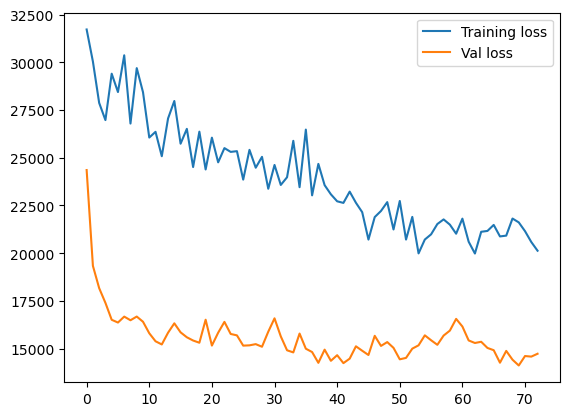

In [205]:
plt.plot(lstm_history.history['loss'], label="Training loss")  
# Vẽ đường biểu diễn mất mát huấn luyện dựa trên lịch sử huấn luyện (history) của mô hình
# Vẽ đồ thị của hàm mất mát trên tập xác thực
plt.plot(lstm_history.history['val_loss'], label="Val loss")  
# Vẽ đường biểu diễn mất mát xác thực dựa trên lịch sử xác thực của mô hình
# Hiển thị chú giải cho đồ thị
plt.legend()  
# Thêm chú giải (legend) để phân biệt các đường biểu diễn trên đồ thị

## 3.6. Model Evaluation

In [206]:
# Dự đoán trên tập huấn luyện sử dụng mô hình LSTM đã huấn luyện
lstm_train_pred = model_lstm.predict(X_train_series)  
# Sử dụng mô hình LSTM để dự đoán các giá trị trên tập dữ liệu huấn luyện (X_train_series)
# Dự đoán trên tập xác thực sử dụng mô hình LSTM đã huấn luyện
lstm_valid_pred = model_lstm.predict(X_valid_series)  
# Sử dụng mô hình LSTM để dự đoán các giá trị trên tập dữ liệu xác thực (X_valid_series)
# Tính RMSE (Root Mean Squared Error) trên tập huấn luyện
print('Train rmse:', np.sqrt(mean_squared_error(Y_train, lstm_train_pred)))  
# Tính và in ra giá trị RMSE giữa nhãn thực tế (Y_train) và giá trị dự đoán (lstm_train_pred)
# Tính RMSE trên tập xác thực
print('Validation rmse:', np.sqrt(mean_squared_error(Y_valid, lstm_valid_pred)))  
# Tính và in ra giá trị RMSE giữa nhãn thực tế (Y_valid) và giá trị dự đoán (lstm_valid_pred)

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Train rmse: 22876.129949889975
Validation rmse: 22805.888220492943


In [207]:
length = len(lstm_valid_pred) 

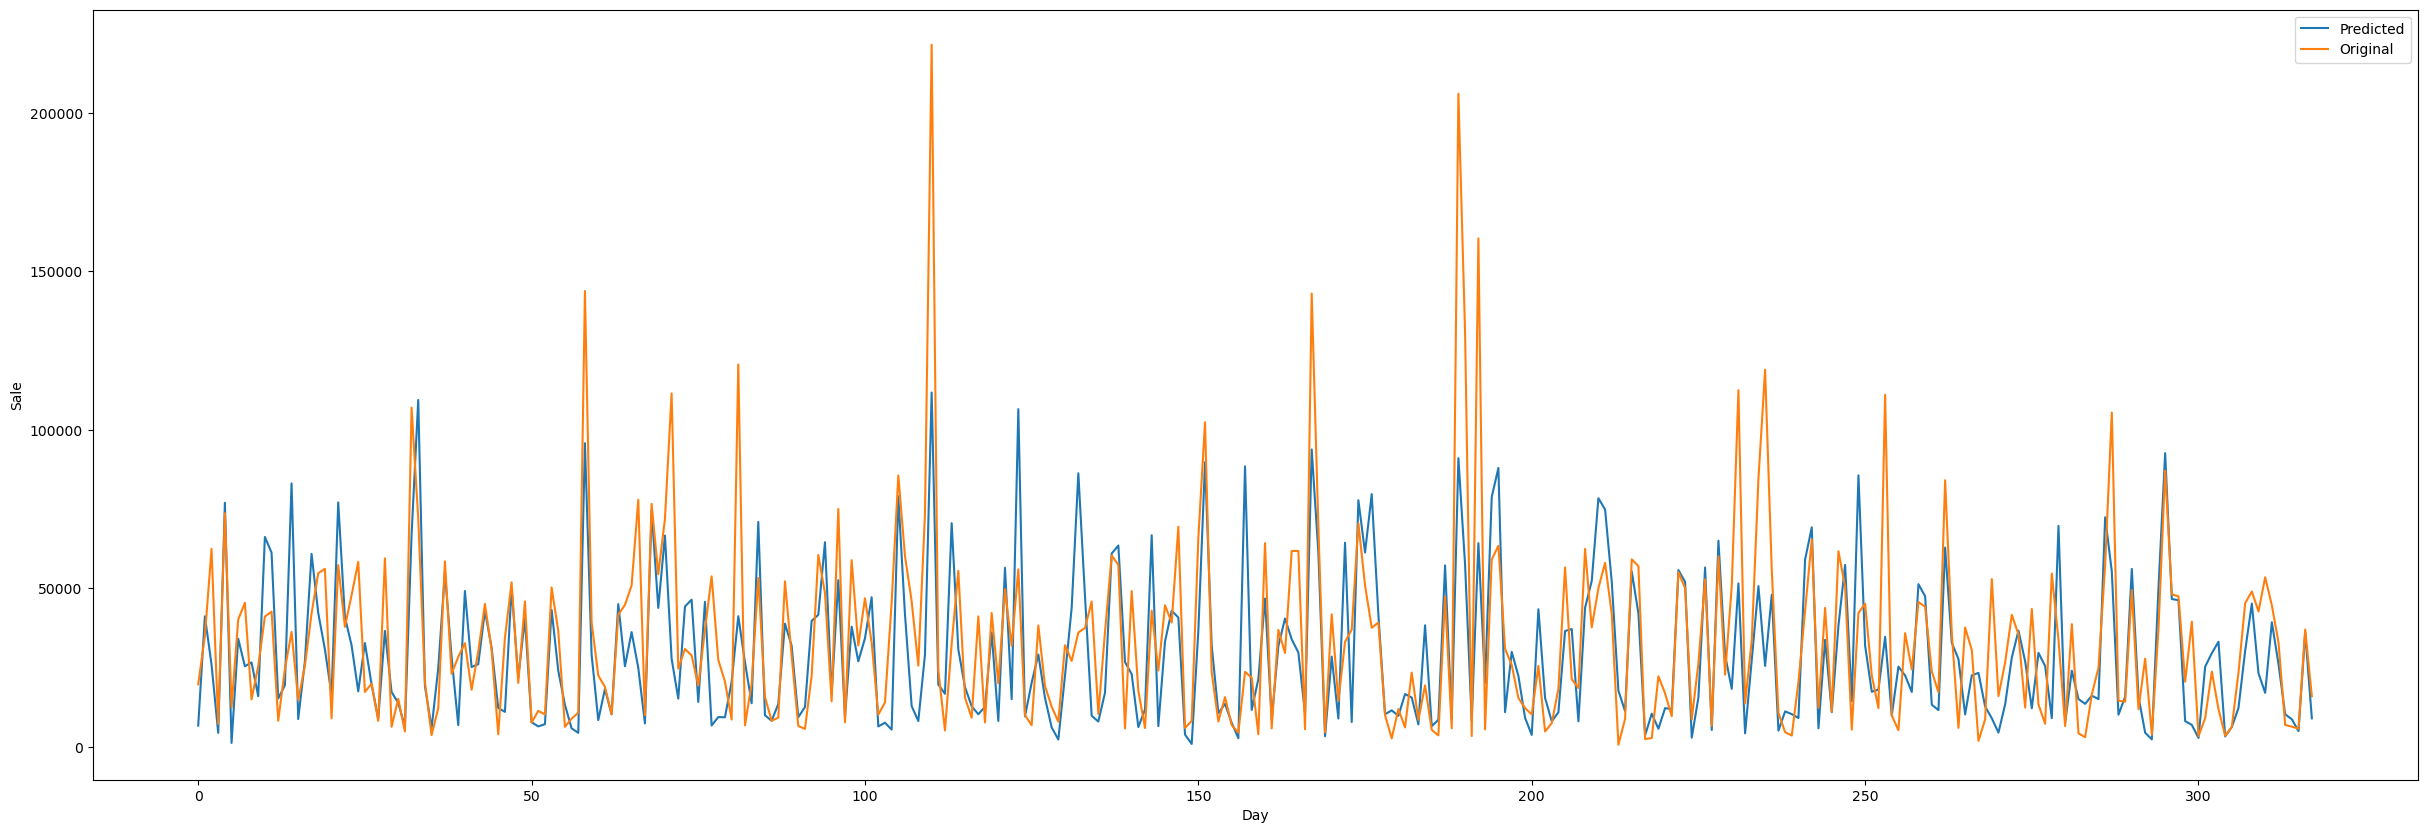

In [208]:
# Dữ liệu để vẽ biểu đồ
x = np.arange(0, length)  # Tạo một mảng từ 0 đến length (chiều dài dữ liệu để vẽ)
y1 = lstm_valid_pred[:length]  # Dữ liệu dự đoán cho biểu đồ (lấy length phần đầu của lstm_valid_pred)
y2 = Y_valid[:length]  # Dữ liệu thực tế cho biểu đồ (lấy length phần đầu của Y_valid)
plt.figure(figsize=(30, 10))  # Tạo biểu đồ với kích thước 30x10 inch
# Vẽ biểu đồ
plt.xlabel("Day")  # Đặt nhãn trục x là "Day"
plt.ylabel("Sale")  # Đặt nhãn trục y là "Sale"
plt.plot(x, y1.reshape(-1), label="Predicted")  # Vẽ đường biểu diễn dự đoán, và gắn nhãn là "Predicted"
plt.plot(x, y2.reshape(-1), label="Original")  # Vẽ đường biểu diễn thực tế, và gắn nhãn là "Original"
plt.legend()  # Hiển thị chú giải (legend) để phân biệt các đường biểu diễn
plt.show()  # Hiển thị biểu đồ

## 3.7. Test Model

In [209]:
# Dự đoán trên tập kiểm tra sử dụng mô hình LSTM đã huấn luyện
lstm_test_pred = model_lstm.predict(X_test_series)  
# Sử dụng mô hình LSTM để dự đoán các giá trị trên tập dữ liệu kiểm tra (X_test_series)
# Tính RMSE (Root Mean Squared Error) trên tập kiểm tra
print('Test rmse:', np.sqrt(mean_squared_error(Y_test, lstm_test_pred)))  
# Tính và in ra giá trị RMSE giữa nhãn thực tế (Y_test) và giá trị dự đoán (lstm_test_pred)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Test rmse: 24116.196699908294


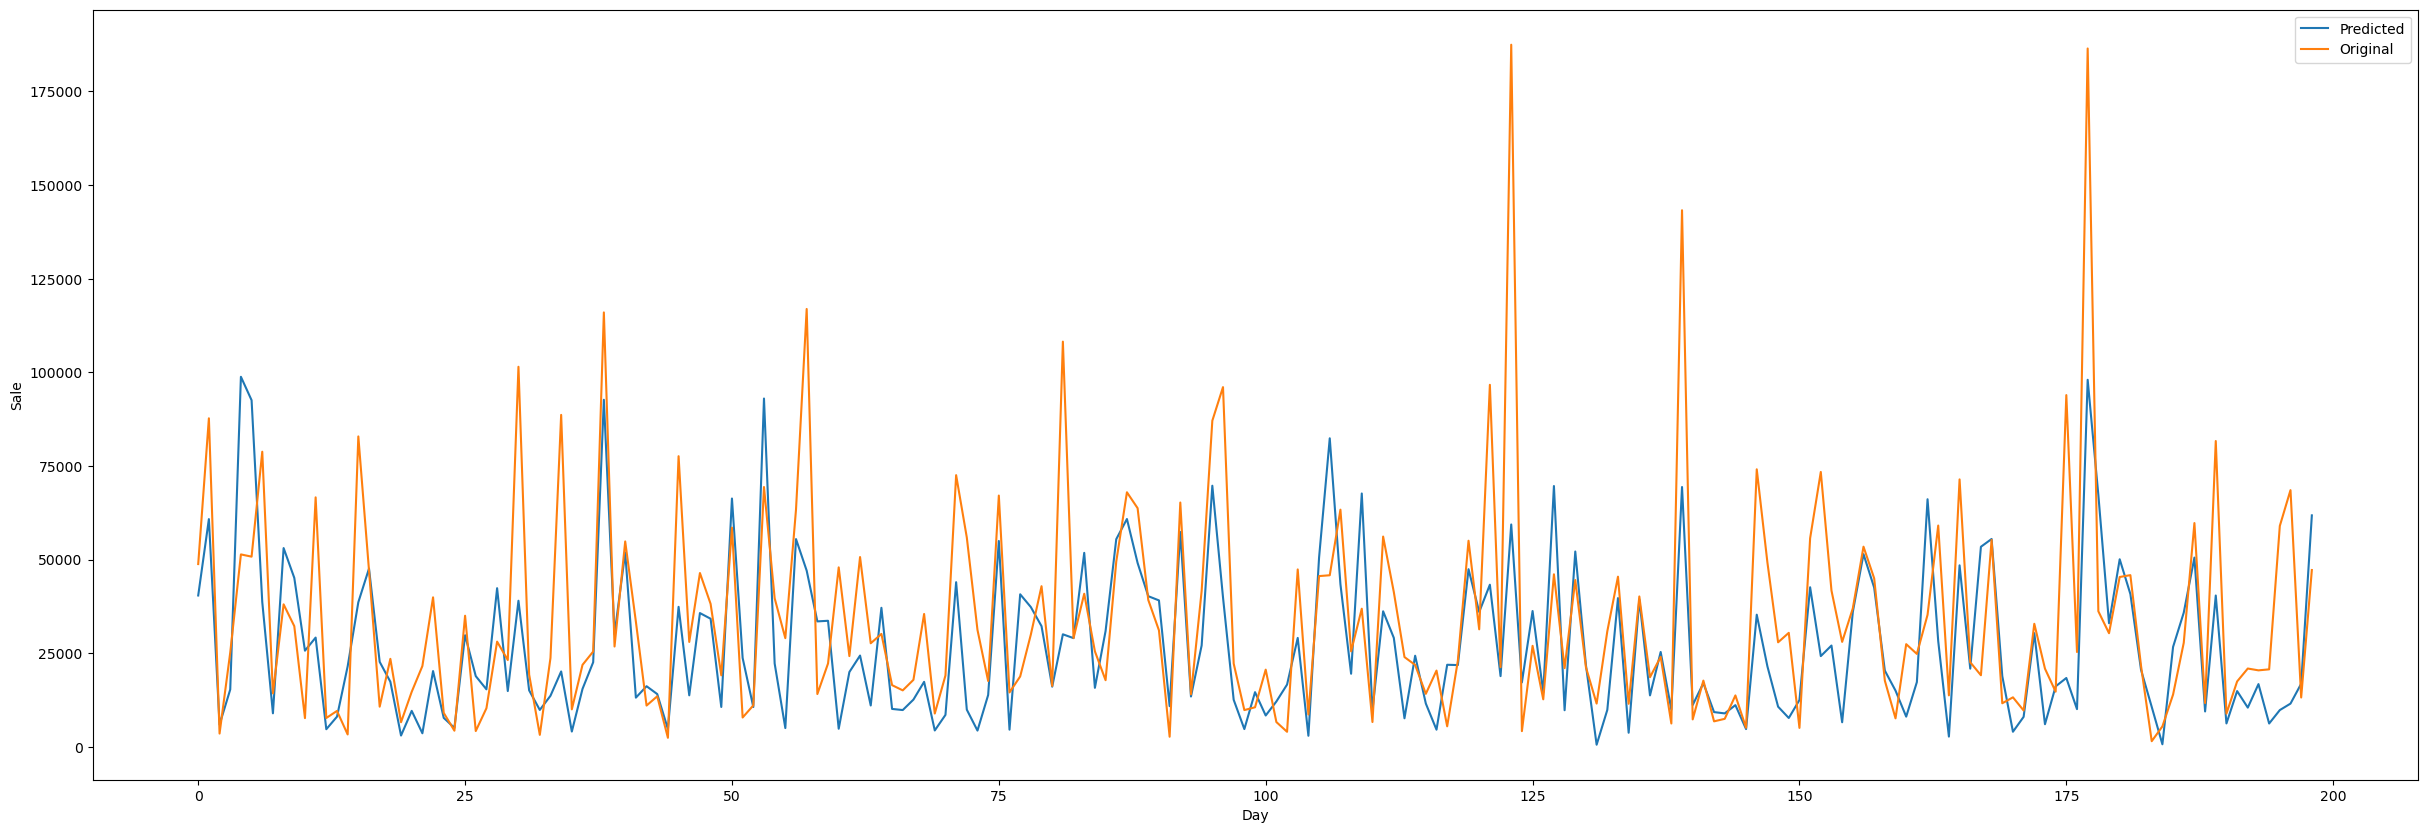

In [210]:
length_test = len(lstm_test_pred)  # Lấy chiều dài của dữ liệu dự đoán trên tập kiểm tra (lstm_test_pred)
x = np.arange(0, length_test)  # Tạo một mảng từ 0 đến length_test để làm trục x cho biểu đồ
y1 = lstm_test_pred[:length_test]  # Lấy dữ liệu dự đoán từ lstm_test_pred với chiều dài length_test
y2 = Y_test[:length_test]  # Lấy dữ liệu thực tế từ Y_test với chiều dài length_test
plt.figure(figsize=(30, 10))  # Tạo một figure cho biểu đồ với kích thước 30x10 inch
# Vẽ biểu đồ
plt.xlabel("Day")  # Đặt nhãn trục x là "Day"
plt.ylabel("Sale")  # Đặt nhãn trục y là "Sale"
plt.plot(x, y1.reshape(-1), label="Predicted")  # Vẽ đường biểu diễn dự đoán, và gắn nhãn là "Predicted"
plt.plot(x, y2.reshape(-1), label="Original")  # Vẽ đường biểu diễn thực tế, và gắn nhãn là "Original"
plt.legend()  # Hiển thị chú giải (legend) để phân biệt các đường biểu diễn
plt.show()  # Hiển thị biểu đồ